In [1]:
import os
import pickle as pkl
import numpy as np

HOME_PATH = os.path.expanduser('~') + '/Projects/ssmsi/'
DATA_PATH = HOME_PATH + 'pickles/topics/dtm_alpha/'

name_file = 'alpha-history_50_pp_small-corpus_25.pkl'
history_alpha = pkl.load(open(DATA_PATH + name_file, 'rb'))

n_iters = history_alpha.shape[0]
n_alphas = history_alpha.shape[2]
T = history_alpha.shape[1]
print history_alpha.shape

(50, 25, 2)


### 3D Plot

In [3]:
import plotly.plotly as py
from plotly.graph_objs import Surface
import plotly.graph_objs as go

list_alphas = []
for i in range(n_alphas):
    alpha = dict(z = history_alpha[:, :, i], type='surface')
    list_alphas.append(alpha)
fig = go.Figure(data=list_alphas)

py.iplot(fig)

### 2D Plot

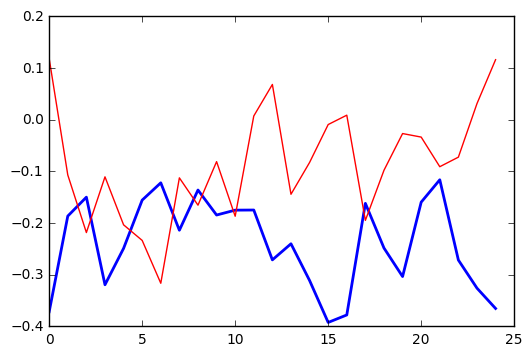

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
alphas_0 = history_alpha[n_iters-1][:, 0]
alphas_1 = history_alpha[n_iters-1][:, 1]
t = np.linspace(0, T-1, num=T)
plt.plot(t, alphas_0, 'b-',linewidth=2)
plt.plot(t, alphas_1,'r-',linewidth=1)

In [6]:
def mean_parameter(arr):
    return np.exp(arr) / np.sum(np.exp(arr))

### Plot the thetas

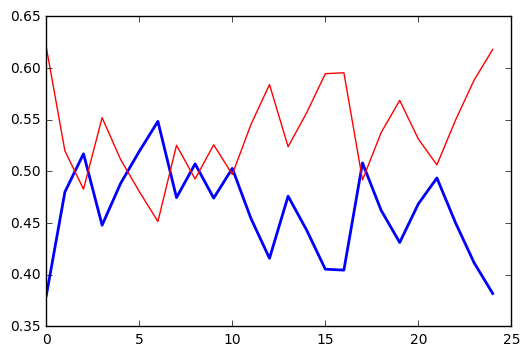

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
alphas_last = history_alpha[n_iters-1]

thetas = np.zeros(shape=alphas_last.shape)
for t, alpha_t in enumerate(alphas_last):
    thetas[t] = mean_parameter(alpha_t)
    
thetas_0 = thetas[:, 0]
thetas_1 = thetas[:, 1]

t = np.linspace(0, T-1, num=T)
plt.plot(t, thetas_0, 'b-',linewidth=2)
plt.plot(t, thetas_1,'r-',linewidth=1)